# Comparing Specific Moscow and Berlin Neighborhoods
Our customers want to move from Moscow to Berlin.

They want to choose the district in which they will find same services that they are used to have in Moscow.

They need a gym in the neighborhood, some nice cafe, bars and restaurants.

Now they are living in Moscow Khamovniki and it is a very good district. We are searching for district in Berlin that will have same venues on the same distances from the center of the district.

Let's look at general properties of their neighborhood;

### Moscow Khamovniki District
![alt text](https://upload.wikimedia.org/wikipedia/commons/0/00/Khamovniki_District%2C_Moscow%2C_Russia_-_panoramio_%28419%29.jpg)

The district extends from Bolshoy Kamenny Bridge into the Luzhniki bend of Moskva River; northern boundary with Arbat District follows Znamenka Street, Gogolevsky Boulevard, Sivtsev Vrazhek and Borodinsky Bridge.

The district contains Pushkin Museum, Cathedral of Christ the Saviour, Devichye Pole medical campus, Novodevichy Convent and memorial cemetery, Luzhniki Stadium. The stretch of Khamovniki between Boulevard Ring and Garden Ring, known as Golden Mile, is downtown Moscow's most expensive housing area.
### Berlin
![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/6/6c/Aerial_view_of_Berlin_%2832881394137%29.jpg/1920px-Aerial_view_of_Berlin_%2832881394137%29.jpg)

Berlin is the capital and largest city of Germany by both area and population.

Berlin straddles the banks of the River Spree, which flows into the River Havel (a tributary of the River Elbe) in the western borough of Spandau. Among the city's main topographical features are the many lakes in the western and southeastern boroughs formed by the Spree, Havel, and Dahme rivers (the largest of which is Lake Müggelsee)

Berlin’s boroughs include old industrial areas that have become thriving cultural centres, as well as sleepy villages, busy markets and arcades, and endless green landscapes, rivers and bathing lakes. But above all there are 12 districts and 95 neighborhoods with average  that we can suggest to our customer.

-----
It looks like Berlin has many significant places that can satisfy our customer!

### Importing Libraries

In [1]:
import numpy as np # vectorized mannera

import pandas as pd #  for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # JSON files

!conda install -c conda-forge geopy --yes # installing geopy
from geopy.geocoders import Nominatim # for latitudes and longitudes


from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# for plotting
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import seaborn as sns #


# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes #Folium installing
import folium # map rendering library

import requests
import math

print('Libraries imported.')

usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # installing geopy
usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: #Folium installing


Libraries imported.


### Defining Foursquare Credentials

In [2]:
CLIENT_ID = 'CIYADSRXQXE1HHWGM3CWLFF23GYODP0NZKZRBQ40IEDLA0YB' # your Foursquare ID
CLIENT_SECRET = '5SGPWBTYUR0HBY5OTZTIOSRIURBY4LYVEPZIRSBSWJ52V205' # your Foursquare Secret
ACCESS_TOKEN = '230CPF0JUS4OSGSLGR20RNDJALTQYXNOK5XKJNJRRJZ1EEED' # your FourSquare Access Token


VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: CIYADSRXQXE1HHWGM3CWLFF23GYODP0NZKZRBQ40IEDLA0YB
CLIENT_SECRET:5SGPWBTYUR0HBY5OTZTIOSRIURBY4LYVEPZIRSBSWJ52V205


Our customer is living in the Moscow Khamovniki District. So let's start by converting the Khamovniki District's address to its latitude and longitude coordinates.

In [3]:
address = 'Malaya Pirogovskaya St., 13/3 119435, Moscow'
# address = "18-20 Rue de la Butte aux Cailles, 75013 Paris, Fransa"
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)
print(location)

55.7265293 37.5615857
Малая Пироговская улица, Квартал №532, район Хамовники, Москва, Центральный федеральный округ, 119435, Россия


## 1. Search for a specific venue category 
We will just clarify what your customer house has around of it

Let's find all venues in 500 metres!

In [4]:
radius = 500 #500 metres

Defining the corresponding URL

In [5]:
def get_url(latitude,longitude):
    url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        latitude, longitude, 
        VERSION, 
        radius, 
        LIMIT)
    return url
get_url(latitude,longitude)

'https://api.foursquare.com/v2/venues/explore?client_id=CIYADSRXQXE1HHWGM3CWLFF23GYODP0NZKZRBQ40IEDLA0YB&client_secret=5SGPWBTYUR0HBY5OTZTIOSRIURBY4LYVEPZIRSBSWJ52V205&ll=55.7265293,37.5615857&v=20180604&radius=500&limit=30'

Sending the GET Request and examine the results

In [6]:
moscow_results = requests.get(get_url(latitude,longitude)).json()

#Getting relevant part of JSON
items = moscow_results['response']['groups'][0]['items']
items[0]

{'reasons': {'count': 0,
  'items': [{'summary': 'This spot is popular',
    'type': 'general',
    'reasonName': 'globalInteractionReason'}]},
 'venue': {'id': '5d657668caaaa80008bb1ac3',
  'name': 'Surf Coffee',
  'location': {'address': 'Москва, ул. Усачёва, д. 62',
   'lat': 55.724556,
   'lng': 37.562386,
   'labeledLatLngs': [{'label': 'display',
     'lat': 55.724556,
     'lng': 37.562386}],
   'distance': 225,
   'postalCode': '119048',
   'cc': 'RU',
   'city': 'Москва',
   'state': 'Москва',
   'country': 'Россия',
   'formattedAddress': ['Москва, ул. Усачёва, д. 62',
    '119048, Москва',
    'Россия']},
  'categories': [{'id': '4bf58dd8d48988d1e0931735',
    'name': 'Coffee Shop',
    'pluralName': 'Coffee Shops',
    'shortName': 'Coffee Shop',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_',
     'suffix': '.png'},
    'primary': True}],
  'photos': {'count': 0, 'groups': []}},
 'referralId': 'e-0-5d657668caaaa80008bb1ac3-0'}

## 2.Data Preparation
In this stage I will use the power of foursquare API for taking data then turning to data frames.

This case I wanted to focus on ratings, house prices, venues categories, and their distances but unfortunately foursquare API doesn't allow us to take enough amount of rating data. So I will focus only on distance and categories of neighborhoods.

Let's create filtered data frame considering under the our customer's 4 venue types

- Restaurant

- Cafe

- Bar

- Gym

In [7]:
# function that extracts the category of the venue 

def get_category_type(row): # it is same code which used in foursquare lab
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
# function that creates dataframe from json profile and taking rating values with for in loop
def creating_dataframe(results): # here i got a few lines from foursquare lab
    items = results['response']['groups'][0]['items']
    dataframe = pd.json_normalize(items) # flatten JSON

    # filtering columns 
    filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
    dataframe_filtered = dataframe.loc[:, filtered_columns]

    # filtering the category for each row
    dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

    # clean columns
    dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]
    columns=['labeledLatLngs','postalCode','address','formattedAddress','cc',
                                     'state','country','crossStreet','id','city','neighborhood']
    for i in columns:
        try:
            dataframe_filtered.drop(columns=i,inplace=True)
        except:
            pass
    # disable chained assignments
    pd.options.mode.chained_assignment = None 
    #Changing to italian,mexican,fast food,sea food... to only restaurant category!
    dataframe_filtered['categories'].loc[(dataframe_filtered['categories'].str.contains(pat='Restaurant') == True) | 
                          (dataframe_filtered['categories'].str.contains(pat='Pizza') == True)] = "Restaurant"
    #Changing to any kind of gym to only gym category!
    dataframe_filtered['categories'].loc[(dataframe_filtered['categories'].str.contains(pat='Gym') == True)] = "Gym"
    #Changing to wine,beer store any kind of alcohol place... to only bar category!
    dataframe_filtered['categories'].loc[(dataframe_filtered['categories'].str.contains(pat='Bar') == True) | 
                           (dataframe_filtered['categories'].str.contains(pat='Beer') == True)] = "Bar"
    #Changing to coffee shop, italian cafe..  to only cafe category!
    dataframe_filtered['categories'].loc[(dataframe_filtered['categories'].str.contains(pat='Coffee') == True) | 
                           (dataframe_filtered['categories'].str.contains(pat='Café') == True) | 
                            (dataframe_filtered['categories'].str.contains(pat='Cafe') == True)]= "Cafe"
    #Cleaning other categories, turning to NaN value
    dataframe_filtered['categories'].loc[(dataframe_filtered['categories'].str.contains(pat='Cafe') == False) & 
                           (dataframe_filtered['categories'].str.contains(pat='Bar') == False) & 
                            (dataframe_filtered['categories'].str.contains(pat='Gym') == False) & 
                          (dataframe_filtered['categories'].str.contains(pat='Restaurant') == False)]= np.nan
    # disable chained assignments
    pd.options.mode.chained_assignment = None 
    #Deleting NaN values and returning dataframe_filtered
    return dataframe_filtered.dropna(subset=['categories']).reset_index(drop=True)
    
#     ------------This hidden lines creating new column for ratings, I couldn't use because--------------- 
#     ------------ foursquare doesn't allow enough quaries!! --------------------------------------
#     dataframe_filtered['rating']=""
#     i=1
#     for i in range(len(dataframe_filtered.id)):
#         url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&oauth_token={}&v={}'.format(
#             dataframe_filtered["id"][i], 
#             CLIENT_ID, 
#             CLIENT_SECRET,
#             ACCESS_TOKEN, 
#             VERSION)
#         result = requests.get(url).json()
#         try:
#             dataframe_filtered['rating'].iloc[i-1:i]=result['response']['venue']['rating']
#         except:
#             dataframe_filtered['rating'].iloc[i-1:i]=float("NaN")
#   ----------------------------------------------------------------------------------------------
    
creating_dataframe(moscow_results)

,name,categories,lat,lng,distance
0,Surf Coffee,Cafe,55.724556,37.562386,225
1,Pinzeria by Bontempi,Restaurant,55.727604,37.567514,390
2,Coffeemania (Кофемания),Cafe,55.727374,37.567698,394
3,Анатомия. Персональный фитнес,Gym,55.722504,37.560276,455
4,Cosmoryba,Restaurant,55.727587,37.567575,393
5,Dance Studio Feelings 2,Gym,55.725440,37.562294,129
6,Cultura Coffee,Cafe,55.723236,37.560804,369
7,Double B Coffee & Tea (Даблби),Cafe,55.728926,37.558408,332
8,The Truffle,Restaurant,55.727625,37.567455,387
9,Сыроварня,Restaurant,55.727667,37.567341,382


## Visualising Categorical Data

Text(0.5, 1.0, 'Moscow Unnormalized Data')

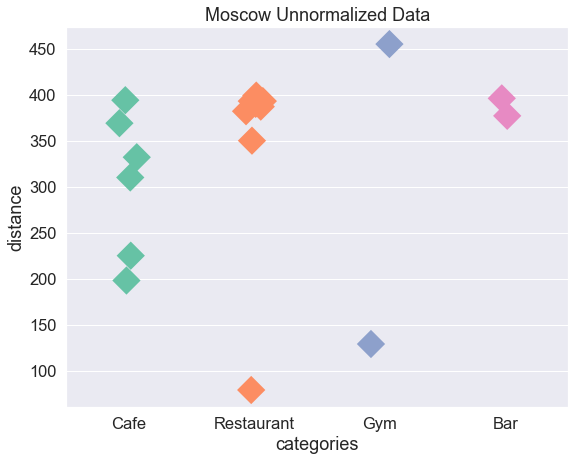

In [8]:
size=(9, 7)
sns.set(font_scale=1.5)  # crazy big
fig, ax = plt.subplots(figsize=size)
ax = sns.stripplot(x=creating_dataframe(moscow_results)["categories"],y=creating_dataframe(moscow_results)["distance"],
                   data=creating_dataframe(moscow_results),palette="Set2", size=20, marker="D")
plt.title('Moscow Unnormalized Data')

As we can see most of the favorite venues of our customer are staying 300 meter to 400 meter

## Mapping Moscow Khamovniki District

In [9]:
# creating map of Moscow Khamovniki District
map_Moscow_Khamovniki = folium.Map(location=[latitude, longitude], zoom_start=15)

# adding markers
for lat, lng,categories,distance in zip(creating_dataframe(moscow_results)['lat'], creating_dataframe(moscow_results)['lng'],
                               creating_dataframe(moscow_results)['categories'],creating_dataframe(moscow_results)['distance']):
    label = '{}, {}'.format(categories,distance)
    label = folium.Popup(categories,parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Moscow_Khamovniki)  
    
map_Moscow_Khamovniki

Folium isn't working in github so I added screenshot of the map here
![alt text](https://i.ibb.co/NF6wQc5/moscow-map.jpg)

## 3.Feature Engineering and Clustering
Creating new features for clarifying weights of this neighborhood.

I will summon how many types of categories and mean distance of every each of them.

In [10]:
def featureengineering(results):
    data_feature=creating_dataframe(results)
    #firs I will delete unnecessary columns
    data_feature.drop(columns=['name','lat','lng'],inplace=True)
    #grouping by categories
    data_feature_grouped = data_feature.groupby('categories').mean().reset_index()
    #Normalizing distance
    data_feature_grouped['distance']=(data_feature_grouped['distance']-data_feature_grouped['distance'].mean())/data_feature_grouped['distance'].std()
    
    return data_feature_grouped
featureengineering(moscow_results)

,categories,distance
0,Bar,1.258905
1,Cafe,-0.647042
2,Gym,-0.942056
3,Restaurant,0.330193


## Clustering

In [11]:
def clustering (results):
    # seting cluster numbers
    kclusters = 4
    data_feature=creating_dataframe(results)
    data_feature.drop(columns=['name','lat','lng'],inplace=True)
    
    #Normalizing distance
    data_feature['distance']=(data_feature['distance']-data_feature['distance'].mean())/data_feature['distance'].std()
    
    
    data_feature_grouped_clustering = data_feature.drop('categories', 1)
    data_feature_grouped = data_feature.groupby('categories').mean().reset_index()

    # k-means cluster
    kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(data_feature_grouped_clustering)
    
    #creating sorted data frame
    data_feature_sorted = pd.DataFrame(columns=data_feature_grouped.columns)
    data_feature_sorted['categories'] = data_feature['categories']
    data_feature_sorted['distance'] = data_feature['distance']
    
    # clustering labels adding
    data_feature_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
    
#     #grouping them again
#     data_feature_grouped = data_feature_sorted.groupby('categories')


    return data_feature_sorted
clustering(moscow_results)

,Cluster Labels,categories,distance
0,2,Cafe,-1.022506
1,3,Restaurant,0.569131
2,3,Cafe,0.607716
3,3,Gym,1.196139
4,3,Restaurant,0.598069
5,0,Gym,-1.948549
6,3,Cafe,0.366559
7,1,Cafe,0.009646
8,3,Restaurant,0.540192
9,3,Restaurant,0.491960


## Visualising of Cluster Data

Text(0.5, 1.0, 'Moscow Clustering Data')

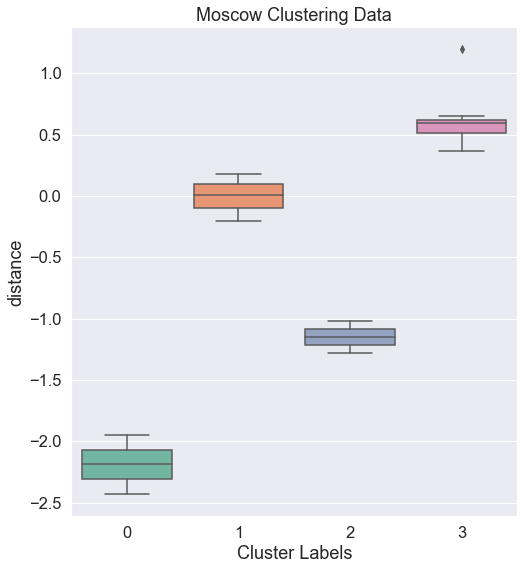

In [12]:
size=(8, 9)
sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize=size)
ax = sns.boxplot(x=clustering(moscow_results)['Cluster Labels'],y=clustering(moscow_results)["distance"],
                   data=clustering(moscow_results),palette="Set2")
plt.title('Moscow Clustering Data')

## 4.Searching Neighborhoods
Looking for same neighborhoods in Berlin

- Collecting latitudes and longtitudes of each neighborhood of Berlin

- Collecting json files for each neighborhoods

- Collecting weights of neighborhoods of Berlin

- Comparing with Moscow Khamovniki District

- Finding minimum mean distance values of neighborhoods
----------

###                                  Berlin Map

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Berlin%2C_administrative_divisions_%28%2Bdistricts_-boroughs_-pop%29_-_de_-_colored.svg/600px-Berlin%2C_administrative_divisions_%28%2Bdistricts_-boroughs_-pop%29_-_de_-_colored.svg.png)
--- --- --- -- 

Here is borough- neighborhood list from [Wikipedia](https://en.wikipedia.org/wiki/Boroughs_and_neighborhoods_of_Berlin)

1.Mitte (Mitte,Moabit,Hansaviertel,Tiergarten,Wedding,Gesundbrunnen)

2.Friedrichshain-Kreuzberg (Friedrichshain,Kreuzberg)

3.Pankow(Pankow,Weißensee,Blankenburg,Heinersdorf,Karow,Stadtrandsiedlung,Malchow,Pankow,Blankenfelde,Buch,Französisch,Buchholz,Niederschönhausen,Rosenthal,Wilhelmsruh)

4.Charlottenburg-Wilmersdorf (Charlottenburg,Wilmersdorf,Schmargendorf,Grunewald,Westend,Charlottenburg-Nord,Halensee)

5.Spandau (Spandau,Haselhorst,Siemensstadt,Staaken,Gatow,Kladow,Hakenfelde,Falkenhagener,Wilhelmstadt)

6.Steglitz-Zehlendorf (Steglit,Lichterfelde,Lankwitz,Zehlendorf,Dahlem,Nikolassee,Wannsee)

7.Tempelhof-Schöneberg (Schöneberg,Friedenau,Tempelhof,Mariendorf,Marienfelde,Lichtenrade)

8.Neukölln (Neukölln,Britz,Buckow,Rudow,Gropiusstadt)

9.Treptow-Köpenick (AltTreptow,Plänterwald,Baumschulenweg,Johannisthal,Niederschöneweide,Altglienicke,Adlershof,Bohnsdorf,Oberschöneweide,Köpenick,Friedrichshagen,Rahnsdorf,Grünau,Müggelheim,Schmöckwitz)

10.Marzahn-Hellersdorf (Marzahn,Biesdorf,Kaulsdorf,Mahlsdorf,Hellersdorf)

11.Lichtenberg (Friedrichsfelde,Karlshorst,Lichtenberg,Falkenberg,Malchow,Wartenberg,Neu-Hohenschönhausen,Alt-Hohenschönhausen ,Fennpfuhl, Rummelsburg)

12.Reinickendorf (Reinickendorf,Tegel,Konradshöhe,Heiligensee,Frohnau,Hermsdorf,Waidmannslust,Lübars,Wittenau,Märkisches Viertel,Borsigwalde)   

----

Collecting latitudes and longtitudes of each neighborhood of Berlin

In [13]:
berlin_neighborhood_list=['Mitte','Moabit','Hansaviertel','Tiergarten','Wedding Berlin','Gesundbrunnen','Friedrichshain','Kreuzberg',
                          'Pankow','Weißensee','Blankenburg','Heinersdorf','Karow','Stadtrandsiedlung Malchow','Pankow','Blankenfelde',
                          'Buch','Französisch Buchholz','Niederschönhausen','Rosenthal','Wilhelmsruh','Charlottenburg','Wilmersdorf',
                          'Schmargendorf','Grunewald','Westend','Charlottenburg-Nord','Halensee','Spandau','Haselhorst','Siemensstadt',
                          'Staaken','Gatow','Kladow','Hakenfelde','Falkenhagener','Wilhelmstadt','Steglit','Lichterfelde','Lankwitz',
                          'Zehlendorf','Dahlem','Nikolassee','Wannsee','Schöneberg','Friedenau','Tempelhof','Mariendorf','Marienfelde',
                          'Lichtenrade','Neukölln','Britz','Buckow','Rudow','Gropiusstadt','Alt Treptow','Plänterwald','Baumschulenweg',
                          'Johannisthal','Niederschöneweide','Altglienicke','Adlershof','Bohnsdorf','Oberschöneweide','Köpenick',
                          'Friedrichshagen','Rahnsdorf','Grünau','Müggelheim','Schmöckwitz','Marzahn','Biesdorf','Kaulsdorf','Mahlsdorf',
                          'Hellersdorf','Friedrichsfelde','Karlshorst','Lichtenberg','Falkenberg','Malchow','Wartenberg',
                          'Neu-Hohenschönhausen','Alt-Hohenschönhausen' ,'Fennpfuhl' ,'Rummelsburg','Reinickendorf','Tegel','Konradshöhe',
                            'Heiligensee','Frohnau','Hermsdorf','Waidmannslust','Lübars','Wittenau','Märkisches Viertel','Borsigwalde']

#We will create lists in order to finding latitudes and longitudes of all these neighborhoods!
neighborhood_list_long=[]
neighborhood_list_lat=[]
location_list=[]
for i in range(len(berlin_neighborhood_list)):
    geolocator = Nominatim(user_agent="foursquare_agent")
    location_list.append(geolocator.geocode(berlin_neighborhood_list[i]))
    try:
        neighborhood_list_lat.append(location_list[i].latitude)
        neighborhood_list_long.append(location_list[i].longitude)
    except: #I need to know which neighborhood doesn't have latitude or longitude
        print(berlin_neighborhood_list[i],i)


Steglit 37


In [14]:
#It seems I should delete Steglit from our list
del berlin_neighborhood_list[37]
#let's check our lists
print(len(berlin_neighborhood_list),len(neighborhood_list_lat),len(neighborhood_list_long))

95 95 95


Collecting json files for each neighborhoods

In [15]:
#Let's create a list which contains url's
url_list=[]
radius=1000 #our customer is agree with 1000m
for i in range(len(berlin_neighborhood_list)):
    url_list.append(get_url(neighborhood_list_lat[i],neighborhood_list_long[i])) #calling get url function!

#now I can create dictionary for json files
results_dict={}
for i in range(len(url_list)):
    results_dict[berlin_neighborhood_list[i]]=requests.get(url_list[i]).json() 
    

Collecting weights of neighborhoods of Berlin and comparing with Moscow Khamovniki District

In [16]:
selected_neighborhoods=[]
for i in range(len(berlin_neighborhood_list)):
    j=0
    k=0
    try:
        if len(featureengineering(moscow_results)['categories']) <=len(featureengineering(results_dict[berlin_neighborhood_list[i]])['categories']):
            while j<len(featureengineering(results_dict[berlin_neighborhood_list[i]])['categories']):
                for l in range(len(featureengineering(moscow_results)['categories'])):
                    if featureengineering(moscow_results)['categories'][l]==featureengineering(results_dict[berlin_neighborhood_list[i]])['categories'][j]:
                        k=k+1
                    else:
                        pass
                j=j+1
            else:
                selected_neighborhoods.append(i) #neighborhood indexes in berlin neighborhood list
                print(i,berlin_neighborhood_list[i], "has",k, "same venues")
        else:
            #print('{} doesnt have enough venue types'.format(berlin_neighborhood_list[i]))
            pass
    except:
#         print('{} doesnt have venue data'.format(berlin_neighborhood_list[i]))
        pass

1 Moabit has 4 same venues
2 Hansaviertel has 4 same venues
5 Gesundbrunnen has 4 same venues
43 Schöneberg has 4 same venues
63 Köpenick has 4 same venues
82 Fennpfuhl has 4 same venues
83 Rummelsburg has 4 same venues
85 Tegel has 4 same venues


**Comparing with Moscow Khamovniki District**

For doing this, first I will plot k-means cluster every each of them with Moscow cluster plot.

Text(0.5, 1.0, 'Moscow Clustering Data')

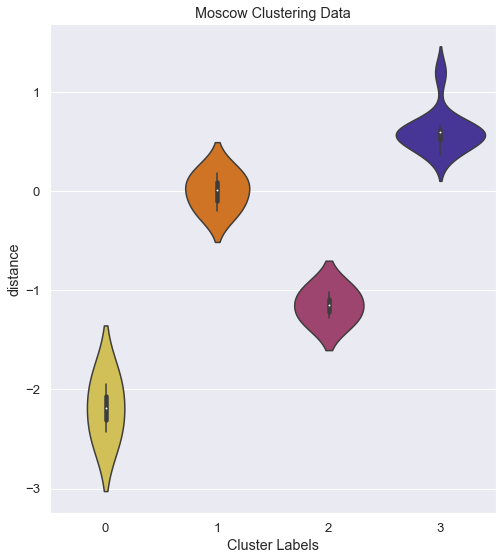

In [17]:
#Moscow Data
sns.set(font_scale=1.2)
size=(8, 9)
fig, ax = plt.subplots(figsize=size)
ax = sns.violinplot(x=clustering(moscow_results)['Cluster Labels'],y=clustering(moscow_results)["distance"],
                   data=clustering(moscow_results),palette="CMRmap_r")
plt.title('Moscow Clustering Data')


## 5. Model Evaluation
In this section, You can observe possible neighborhoods and how they match with our customer's neighborhood with K-Means clustering.

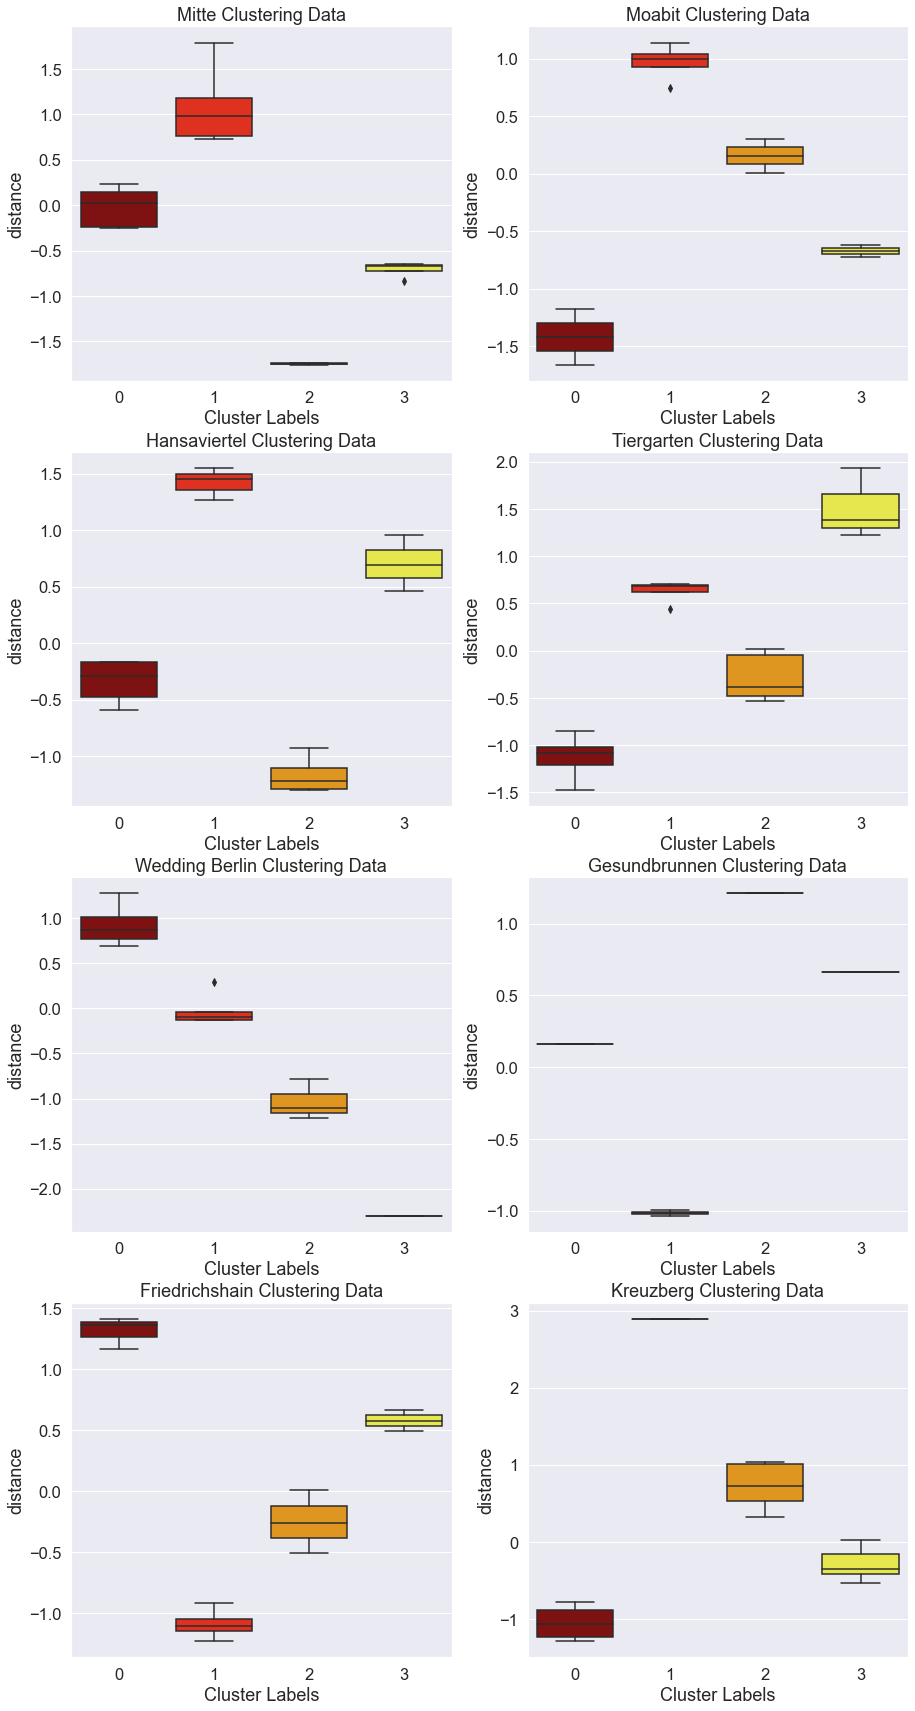

In [18]:
#Coding for iterable plotting 
len_1=math.ceil(len(selected_neighborhoods)/2)

size=(15, len_1*7.5)
sns.set(font_scale=1.5)
fig, ax = plt.subplots(len_1,2,figsize=size)
for i in range(len(selected_neighborhoods)):
    plt.subplot(len_1,2, i+1)
    sns.boxplot(x=clustering(results_dict[berlin_neighborhood_list[selected_neighborhoods[i]]])['Cluster Labels'],
                y=clustering(results_dict[berlin_neighborhood_list[selected_neighborhoods[i]]])["distance"],
                data=clustering(results_dict[berlin_neighborhood_list[selected_neighborhoods[i]]]),
                palette='hot')
    plt.title('{} Clustering Data'.format(berlin_neighborhood_list[i]))

Finding minimum mean distance values of neighborhoods

In [19]:
for i in range(len(selected_neighborhoods)): print(berlin_neighborhood_list[i],clustering(results_dict[berlin_neighborhood_list[selected_neighborhoods[i]]])['distance'].mean())

Mitte 2.44902137784961e-17
Moabit 1.942890293094024e-16
Hansaviertel 5.921189464667501e-17
Tiergarten 8.489940776545314e-17
Wedding Berlin 1.0362081563168128e-16
Gesundbrunnen -1.1102230246251566e-17
Friedrichshain 0.0
Kreuzberg -3.700743415417188e-17


## 6. Result - Conclusion

All of these neighborhoods have enough venue types and counts!

With the help of observing our final illustration of K-means clustered plots and minimum mean distance value, I want to focus on which neighborhood has closer venues to the neighborhood center. Because in our case, I want to recommend the closest venues to our customer.

With this data science project, I focused on center locations of neighborhoods because I don't know our customer's the house in Berlin yet.

**Mitte clusters have minimum distances. I can definitely recommend Mitte!**

!!! All notebook is iterable so you can change Moscow Khamovniki to wherever you want!

In [20]:
# creating map of Berlin Mitte Neighborhood
Berlin_mitte_map = folium.Map(location=[neighborhood_list_lat[1], neighborhood_list_long[1]], zoom_start=10)

# adding markers
for lat, lng,categories,distance in zip(creating_dataframe(results_dict[berlin_neighborhood_list[selected_neighborhoods[i]]])['lat'], 
                                        creating_dataframe(results_dict[berlin_neighborhood_list[selected_neighborhoods[i]]])['lng'],
                               creating_dataframe(results_dict[berlin_neighborhood_list[selected_neighborhoods[i]]])['categories'],
                                        creating_dataframe(results_dict[berlin_neighborhood_list[selected_neighborhoods[i]]])['distance']):
    label = '{}, {}'.format(categories,distance)
    label = folium.Popup(categories,parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(Berlin_mitte_map)  
    
Berlin_mitte_map

Folium isn't working in github so I added screenshot of the map here
![alt text](https://i.ibb.co/chwx1Vz/Berlin-map.jpg)
General view of Mitte
![alt text](https://www.penta-realestate.de/wp-content/uploads/2018/06/180606_penta-mitte.jpg)
